In [ ]:
## Credit Risk Analysis Classification Machine Learning Model

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
file_path = '/content/bankloans.csv.xls'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [ ]:
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,700.000000
mean,35.235652,1.695652,8.781739,8.485217,47.982609,10.063391,1.605111,3.103844,0.261429
std,8.089961,0.927051,6.914762,6.977725,40.508814,6.584288,2.135967,3.529273,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.200000,0.415584,1.047996,0.000000
50%,35.000000,1.000000,7.000000,7.000000,36.000000,8.750000,0.899130,2.038053,0.000000
75%,41.000000,2.000000,13.000000,12.000000,56.750000,13.600000,1.898820,3.864960,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [ ]:
df.info

<bound method DataFrame.info of       age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0      41   3      17       12     176      9.3  11.359392  5.008608      1.0
1      27   1      10        6      31     17.3   1.362202  4.000798      0.0
2      40   1      15       14      55      5.5   0.856075  2.168925      0.0
3      41   1      15       14     120      2.9   2.658720  0.821280      0.0
4      24   2       2        0      28     17.3   1.787436  3.056564      1.0
...   ...  ..     ...      ...     ...      ...        ...       ...      ...
1145   34   1      12       15      32      2.7   0.239328  0.624672      NaN
1146   32   2      12       11     116      5.7   4.026708  2.585292      NaN
1147   48   1      13       11      38     10.8   0.722304  3.381696      NaN
1148   35   2       1       11      24      7.8   0.417456  1.454544      NaN
1149   37   1      20       13      41     12.9   0.899130  4.389870      NaN

[1150 rows x 9 columns]>

In [ ]:
df.isnull().sum()

,0
age,0
ed,0
employ,0
address,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,450


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

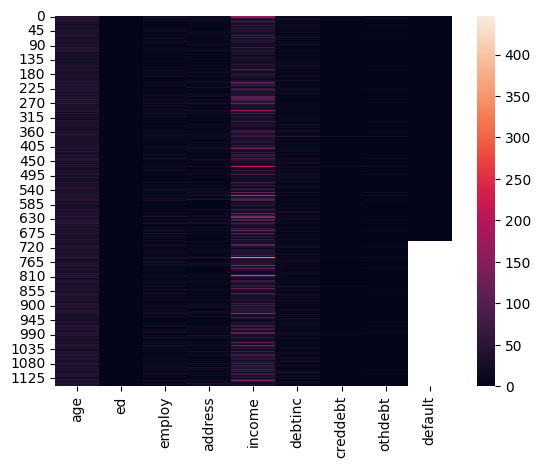

In [ ]:
sns.heatmap(df)

In [ ]:
df.corr()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.002492,0.574267,0.602485,0.473617,-0.001158,0.259070,0.335375,-0.137657
ed,0.002492,1.000000,-0.147498,0.048681,0.201183,0.006585,0.112560,0.113552,0.114676
employ,0.574267,-0.147498,1.000000,0.369740,0.630706,-0.035746,0.355986,0.423628,-0.282978
address,0.602485,0.048681,0.369740,1.000000,0.299643,-0.087116,0.106122,0.139951,-0.164451
income,0.473617,0.201183,0.630706,0.299643,1.000000,-0.044926,0.531977,0.596108,-0.070970
debtinc,-0.001158,0.006585,-0.035746,-0.087116,-0.044926,1.000000,0.532365,0.560218,0.389575
creddebt,0.259070,0.112560,0.355986,0.106122,0.531977,0.532365,1.000000,0.658881,0.244740
othdebt,0.335375,0.113552,0.423628,0.139951,0.596108,0.560218,0.658881,1.000000,0.145713
default,-0.137657,0.114676,-0.282978,-0.164451,-0.070970,0.389575,0.244740,0.145713,1.000000


In [ ]:
df.isna().sum()

,0
age,0
ed,0
employ,0
address,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,450


In [ ]:
df.shape

(1150, 8)

In [ ]:
## We have dropped the address column as it is irrelevant to our model

In [ ]:
df.head()

,age,ed,employ,income,debtinc,creddebt,othdebt,default
0,41,3,17,176,9.3,11.359392,5.008608,1.0
1,27,1,10,31,17.3,1.362202,4.000798,0.0
2,40,1,15,55,5.5,0.856075,2.168925,0.0
3,41,1,15,120,2.9,2.658720,0.821280,0.0
4,24,2,2,28,17.3,1.787436,3.056564,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1150 non-null   int64  
 1   ed        1150 non-null   int64  
 2   employ    1150 non-null   int64  
 3   income    1150 non-null   int64  
 4   debtinc   1150 non-null   float64
 5   creddebt  1150 non-null   float64
 6   othdebt   1150 non-null   float64
 7   default   700 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 72.0 KB


In [ ]:
new_corr_matrix=df.corr()

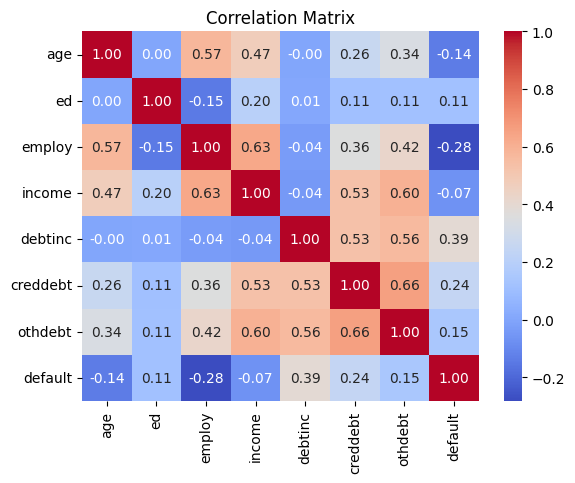

In [ ]:
sns.heatmap(new_corr_matrix,annot=True,cmap='coolwarm',fmt='0.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
## It is observed from the correlation matrix that no two columns have a correlation score of greater than 0.70.
## Hence, these 8 columns are relevent to our model and will not be dropped.

In [ ]:
df['default'].value_counts() ## The class '1.0' is the minority.

,count
default,
0.0,517
1.0,183


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1150 non-null   int64  
 1   ed        1150 non-null   int64  
 2   employ    1150 non-null   int64  
 3   income    1150 non-null   int64  
 4   debtinc   1150 non-null   float64
 5   creddebt  1150 non-null   float64
 6   othdebt   1150 non-null   float64
 7   default   700 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 72.0 KB


In [ ]:
df.dropna(inplace=True)
df.info() ## as the 'deafult' contained na values, we had to drop the corresponding values in the other columns.

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   income    700 non-null    int64  
 4   debtinc   700 non-null    float64
 5   creddebt  700 non-null    float64
 6   othdebt   700 non-null    float64
 7   default   700 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 49.2 KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X=df.drop('default',axis=1)
y=df['default']

In [ ]:
## Train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(490, 7) (210, 7) (490,) (210,)


In [ ]:
## Scaling the data

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
## Logistic Regression Model

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=0.40,random_state=24)
lr.fit(X_train,y_train)

LogisticRegression(C=0.4, random_state=24)

In [ ]:
lr_pred=lr.predict(X_test)

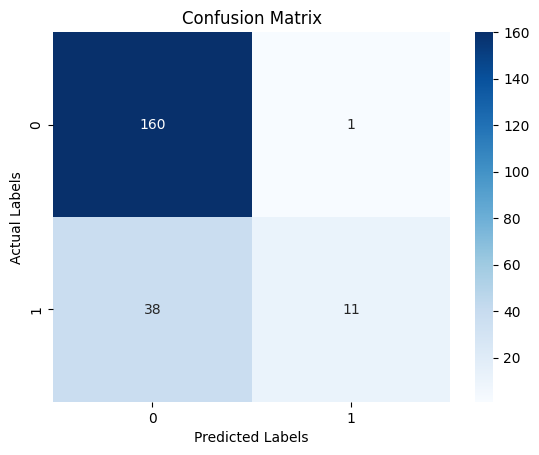

In [ ]:
cm=confusion_matrix(y_test,lr_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
##Gradient Boosting and Cross Validation

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import KFold
n_folds = 5
max_evals = 5

In [ ]:
train_set=lgb.Dataset(data=X_train,label=y_train)
test_set=lgb.Dataset(data=X_test,label=y_test)

In [ ]:
## Getting the default hyperparameters
model=lgb.LGBMClassifier()
default_params=model.get_params()

In [ ]:
## Cross Validation

cv_results=lgb.cv(default_params,train_set,num_boost_round=100,callbacks=[lgb.early_stopping(stopping_rounds=20)],metrics='auc',nfold=n_folds,seed=42)

[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 7
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 7
[LightGBM] [Warning] Unknown p

In [ ]:
## Keys available in cv_results
print("Keys in Cross Validation results: ", cv_results.keys())

Keys in Cross Validation results:  dict_keys(['valid auc-mean', 'valid auc-stdv'])


In [ ]:
print('The maximum validation ROC AUC was: {:.5f} with a standard deviation of {:.5f}.'\
      .format(cv_results['valid auc-mean'][-1], cv_results['valid auc-stdv'][-1]))
print('The optimal number of boosting rounds (estimators) was {}.'.format(len(cv_results['valid auc-mean'])))

The maximum validation ROC AUC was: 0.75754 with a standard deviation of 0.07765.
The optimal number of boosting rounds (estimators) was 27.


In [ ]:
## Hyperparameter tuning with RandomGridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid = {
    'boosting_type': ['gbdt', 'goss', 'dart'],
    'colsample_bytree': list(np.linspace(0.6, 1, 10)),
    'learning_rate': list(np.logspace(np.log10(0.1), np.log10(0.5), base = 10, num = 20)),  # greater learning rate, to learn more from less data
    'max_depth': list(range(3, 10)),  # less features, hence less depth
    'min_child_samples': list(range(10, 100, 5)),  # small data, hence less samples
    'n_estimators': list(range(20, 80)),  # we got the optimal number - 68
    'num_leaves': list(range(5, 50)),  # small data, hence less leaves
    'reg_alpha': list(np.linspace(0, 1)),
    'reg_lambda': list(np.linspace(0, 1)),
    'subsample': list(np.linspace(0.5, 1, 100)),
    'is_unbalance': [True, False]
}

In [ ]:
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   n_iter=10, scoring='roc_auc', cv=5, verbose=1, random_state=24)

# Perform RandomizedSearchCV on the dataset
random_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 107, number of negative: 285
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 500
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 7
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.272959 -> initscore=-0.979660
[LightGBM] [Info] Start training from score -0.97966

In [ ]:
import pprint
pprint.pprint(random_search.best_params_)

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.6444444444444444,
 'is_unbalance': True,
 'learning_rate': 0.16623687636846785,
 'max_depth': 3,
 'min_child_samples': 30,
 'n_estimators': 30,
 'num_leaves': 35,
 'reg_alpha': 0.9591836734693877,
 'reg_lambda': 0.3469387755102041,
 'subsample': 0.8787878787878789}


In [ ]:
best_lgb_model = lgb.LGBMClassifier(**random_search.best_params_)
best_lgb_model.fit(X_train, y_train)
preds = best_lgb_model.predict_proba(X_test)[:, 1]
print('The best model from random search scores {:.5f} ROC AUC on the test set.'\
      .format(roc_auc_score(y_test, preds)))

[LightGBM] [Info] Number of positive: 134, number of negative: 356
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 490, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.273469 -> initscore=-0.977091
[LightGBM] [Info] Start training from score -0.977091
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

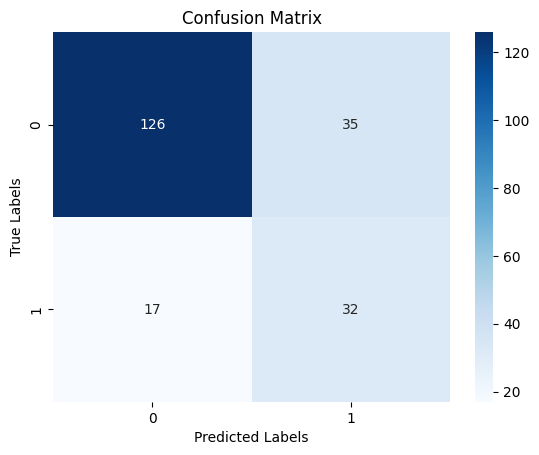

In [ ]:
y_preds = best_lgb_model.predict(X_test)
# y_preds
cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
## Calculating Type I(False Postitive Rate) and Type II(False Negative Rate)

TP=cm[1,1]
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]

type_I_error_rate=FP/(FP+TN)
type_II_error_rate=FN/(FN+TP)

print(f"Confusion Matrix:\n{cm}")
print(f"Type I Error (False Positive Rate): {type_I_error_rate:.2f}")
print(f"Type II Error (False Negative Rate): {type_II_error_rate:.2f}")

Confusion Matrix:
[[126  35]
 [ 17  32]]
Type I Error (False Positive Rate): 0.22
Type II Error (False Negative Rate): 0.35


Results

Performed classification using Logistic Regression and LightGBM models.

Applied Hyperparameter tuning to get an AUC score of 0.82 i.e. 82% on our test dataset.

We also get a pretty low Type I and Type II error rates.